In [72]:
%matplotlib widget
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [73]:
from slam.basis import CircuitTemplate

basis = CircuitTemplate()
basis.build(3)
basis.spanning_range = range(3, 4)
basis.circuit.draw()

┌─────────────┐┌──────────────┐ ┌─────────────┐ ┌──────────────┐»
q_0: ┤ U(P0,P1,P2) ├┤0             ├─┤ U(P6,P7,P8) ├─┤0             ├»
     ├─────────────┤│  Riswap(0.5) │┌┴─────────────┴┐│  Riswap(0.5) │»
q_1: ┤ U(P3,P4,P5) ├┤1             ├┤ U(P9,P10,P11) ├┤1             ├»
     └─────────────┘└──────────────┘└───────────────┘└──────────────┘»
«     ┌────────────────┐┌──────────────┐┌────────────────┐
«q_0: ┤ U(P12,P13,P14) ├┤0             ├┤ U(P18,P19,P20) ├
«     ├────────────────┤│  Riswap(0.5) │├────────────────┤
«q_1: ┤ U(P15,P16,P17) ├┤1             ├┤ U(P21,P22,P23) ├
«     └────────────────┘└──────────────┘└────────────────┘

In [74]:
from slam.cost_function import BasicCost, MakhlinFunctionalCost

objective1 = BasicCost()
objective2 = MakhlinFunctionalCost()

from slam.sampler import GateSample
from qiskit.circuit.library import SwapGate

sampler = GateSample(gate=SwapGate())

from slam.optimizer import TemplateOptimizer

# by default use BFGS
optimizer1 = TemplateOptimizer(
    basis=basis, objective=objective1, override_fail=1, use_callback=True
)
optimizer2 = TemplateOptimizer(
    basis=basis, objective=objective2, override_fail=1, use_callback=True
)
##
optimizer3 = TemplateOptimizer(
    basis=basis,
    objective=objective1,
    override_fail=1,
    use_callback=True,
    override_method="Nelder-Mead",
)
optimizer4 = TemplateOptimizer(
    basis=basis,
    objective=objective2,
    override_fail=1,
    use_callback=True,
    override_method="Nelder-Mead",
)

from slam.utils.visualize import optimizer_training_plot

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.5, 0.5, 0.5)
INFO:root:Starting opt on template size 3
100%|██████████| 5/5 [00:20<00:00,  4.04s/it]
INFO:root:Cycle (k =3), Best Loss=4.739723946656227e-09
INFO:root:Overall Best Loss=4.739723946656227e-09
INFO:root:Fail: (0.5, 0.5, 0.5), Found: (0.50001393, 0.49996782, 0.49994962)


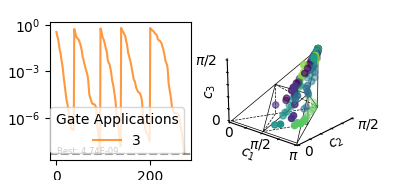

In [75]:
_ret1 = optimizer1.approximate_from_distribution(sampler)
optimizer_training_plot(_ret1[0], _ret1[1]);

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.5, 0.5, 0.5)
INFO:root:Starting opt on template size 3
100%|██████████| 5/5 [00:16<00:00,  3.37s/it]
INFO:root:Cycle (k =3), Best Loss=0.001829051657027004
INFO:root:Overall Best Loss=0.001829051657027004
INFO:root:Fail: (0.5, 0.5, 0.5), Found: (0.50592293, 0.4726283, 0.46591701)
/home/evm9/slam_decomposition/slam/utils/visualize.py:84: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  #     fig.suptitle(f"Training Data (N={len(training_loss)})")


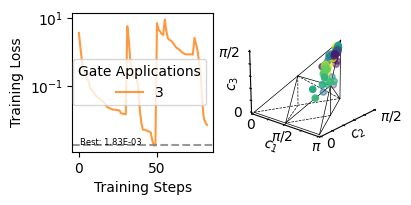

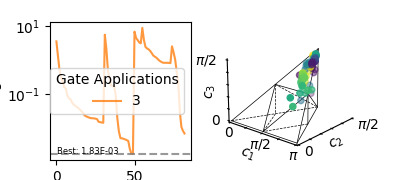

In [76]:
_ret2 = optimizer2.approximate_from_distribution(sampler)
optimizer_training_plot(_ret2[0], _ret2[1])

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.5, 0.5, 0.5)
INFO:root:Starting opt on template size 3
100%|██████████| 5/5 [01:28<00:00, 17.71s/it]
INFO:root:Cycle (k =3), Best Loss=6.0223121390201584e-05
INFO:root:Overall Best Loss=6.0223121390201584e-05
INFO:root:Fail: (0.5, 0.5, 0.5), Found: (0.50208505, 0.49575621, 0.49503885)


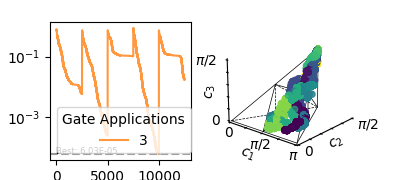

In [77]:
_ret3 = optimizer3.approximate_from_distribution(sampler)
optimizer_training_plot(_ret3[0], _ret3[1]);

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.5, 0.5, 0.5)
INFO:root:Starting opt on template size 3
  0%|          | 0/5 [00:20<?, ?it/s]
INFO:root:Cycle (k =3), Best Loss=4.999999961429751e-16
INFO:root:Break on cycle 3
INFO:root:Overall Best Loss=4.999999961429751e-16
INFO:root:Success: (0.5, 0.5, 0.5), Found: (0.50000754, 0.49999014, 0.49996671)


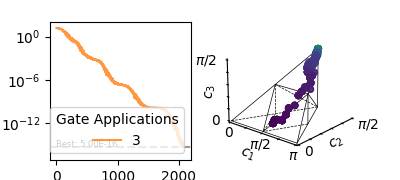

In [78]:
_ret4 = optimizer4.approximate_from_distribution(sampler)
optimizer_training_plot(_ret4[0], _ret4[1]);